In [ ]:
library("MASS")
library("e1071")
library("R.utils")


# 1)

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

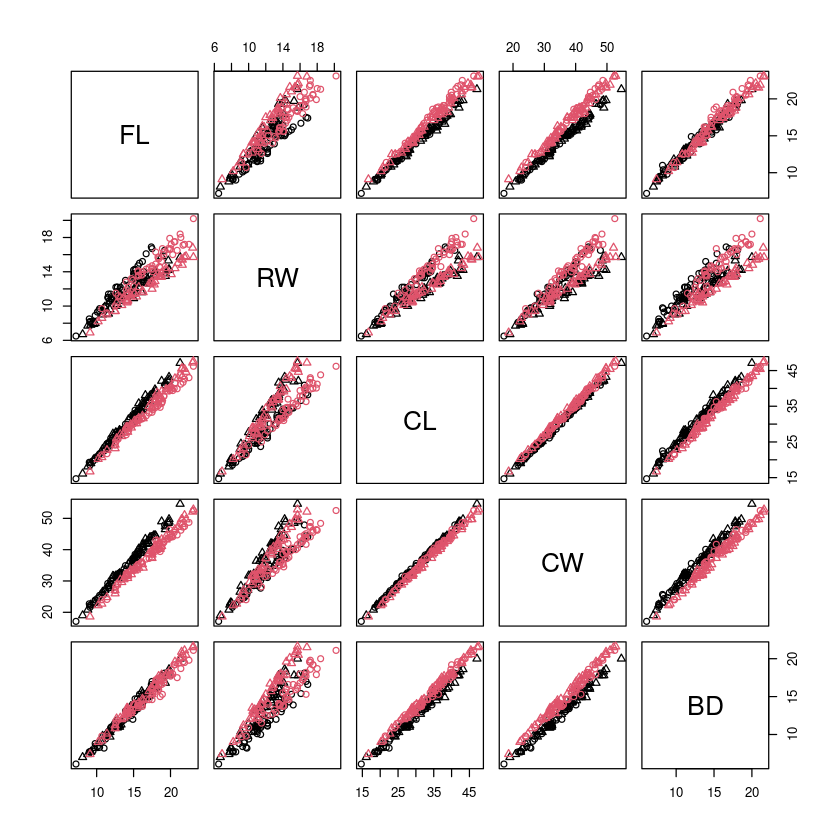

In [2]:
data(crabs)
summary(crabs)
plot(crabs[, 4:8], col = as.numeric(crabs[, 1]), pch = as.numeric(crabs[, 2]))


In [3]:
checkcluster <- function(clust, real) {
    tabla <- table(clust, real)
    match <- matchClasses(as.matrix(tabla), method = "exact")
    print(tabla[, match])
}


# Pruebo con los datos sin modificar

In [4]:

set.seed(20221113) # Puedo setear la seed para que sea reproducible
km <- kmeans(crabs[, 4:8], 2)

checkcluster(km$cluster, crabs$sp)
checkcluster(km$cluster, crabs$sex)


Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59 %
     real
clust  B  O
    1 61 43
    2 39 57
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
     real
clust  F  M
    1 53 51
    2 47 49


No consigo nada

# Aplico log a las variables de crab para ver si consigo encontrar mejores clusters

In [5]:
crabs.log <- log(crabs[, 4:8])
km.log <- kmeans(crabs.log, 2)

checkcluster(km.log$cluster, crabs$sp)
checkcluster(km.log$cluster, crabs$sex)


Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
     real
clust  O  B
    1 73 52
    2 27 48
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
     real
clust  F  M
    1 64 61
    2 36 39


Nada de nuevo

# Intenté hacer log una a una para ver si ayudaba en algo pero nada

In [6]:
crabs.vars <- crabs[, 4:8]
for (i in 1:ncol(crabs.vars)) {
    crabs.temp <- cbind(crabs.vars[, -i], log(crabs.vars[, i]))
    km.temp <- kmeans(crabs.temp, 2)
    print(paste("Haciendo log en variable:", i))
    checkcluster(km.temp$cluster, crabs$sp)
    checkcluster(km.temp$cluster, crabs$sex)
}


[1] "Haciendo log en variable: 1"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 56.5 %
     real
clust  O  B
    1 57 44
    2 43 56
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
     real
clust  M  F
    1 52 49
    2 48 51
[1] "Haciendo log en variable: 2"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 56.5 %
     real
clust  O  B
    1 60 47
    2 40 53
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
     real
clust  M  F
    1 54 53
    2 46 47
[1] "Haciendo log en variable: 3"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 58 %
     real
clust  B  O
    1 57 41
    2 43 59
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
     real
clust  M  F
    1 50 48
    2 50 52
[1] "Haciendo 

Los porcentajes de acierto siguen fluctuando mucho

# Pruebo con scale sobre log

In [7]:
crabs.log.scale <- scale(crabs.log)
km.log.scale <- kmeans(crabs.log.scale, 2)

checkcluster(km.log.scale$cluster, crabs$sp)
checkcluster(km.log.scale$cluster, crabs$sex)


Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
     real
clust  O  B
    1 73 52
    2 27 48
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
     real
clust  F  M
    1 64 61
    2 36 39


Igual que al principio

# Pruebo con PCA sobre los datos con log

In [8]:
crabs.pca <- prcomp(crabs.log, scale = TRUE)
km.pca <- kmeans(crabs.pca$x[, 1:2], 2)

checkcluster(km.pca$cluster, crabs$sp)
checkcluster(km.pca$cluster, crabs$sex)


Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
     real
clust  O  B
    1 73 52
    2 27 48
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
     real
clust  F  M
    1 64 61
    2 36 39


Literalmente igual que al principio

# Intento primero scale y luego PCA

In [9]:
crabs.scale.pca <- prcomp(crabs.log.scale, scale = TRUE)
km.scale.pca <- kmeans(crabs.scale.pca$x[, 1:2], 2)

checkcluster(km.scale.pca$cluster, crabs$sp)
checkcluster(km.scale.pca$cluster, crabs$sex)


Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
     real
clust  O  B
    1 73 52
    2 27 48
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
     real
clust  F  M
    1 64 61
    2 36 39


Nada que decir

# Intento pca y luego scale

In [10]:
crabs.pca.scale <- prcomp(crabs.log, scale = TRUE)
crabs.pca.scale.x <- scale(crabs.pca.scale$x)
km.pca.scale <- kmeans(crabs.pca.scale.x, 2)

checkcluster(km.pca.scale$cluster, crabs$sp)
# checkcluster(km.pca.scale$cluster, crabs$sex);


Direct agreement: 2 of 2 pairs
Cases in matched pairs: 100 %
     real
clust   B   O
    1 100   0
    2   0 100


Por fin encontré un cluster que separa perfectamente los datos por la especie.

Pero usé kmeans sin imprimir los gráficos, cuando charlé con mis compañeros me entere que tambien se podía separar por sexo. Procedo a graficar para ver que pasa.

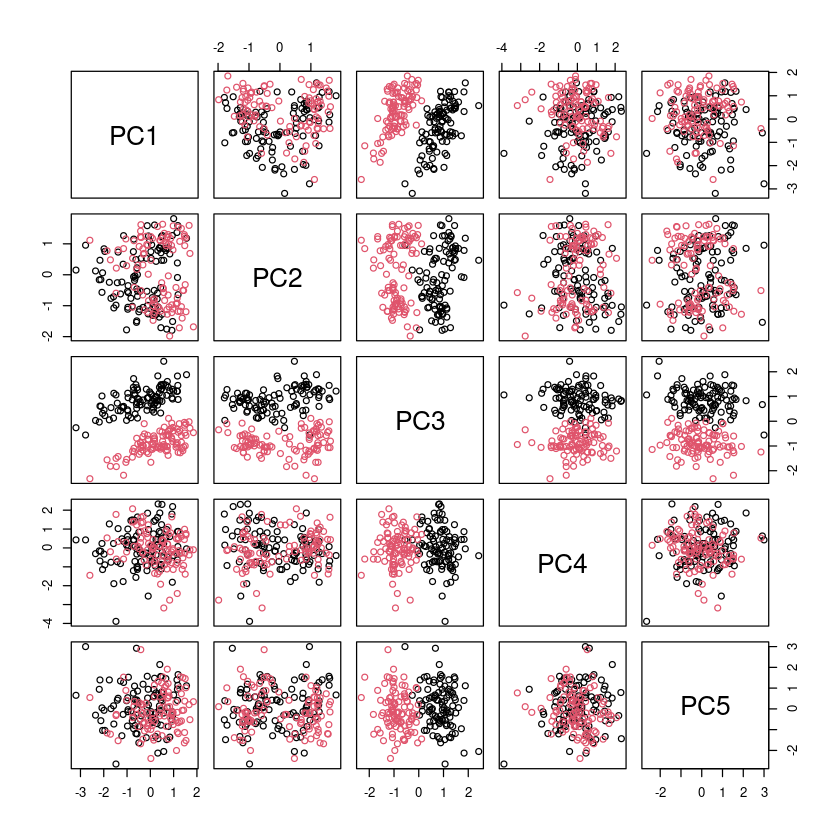

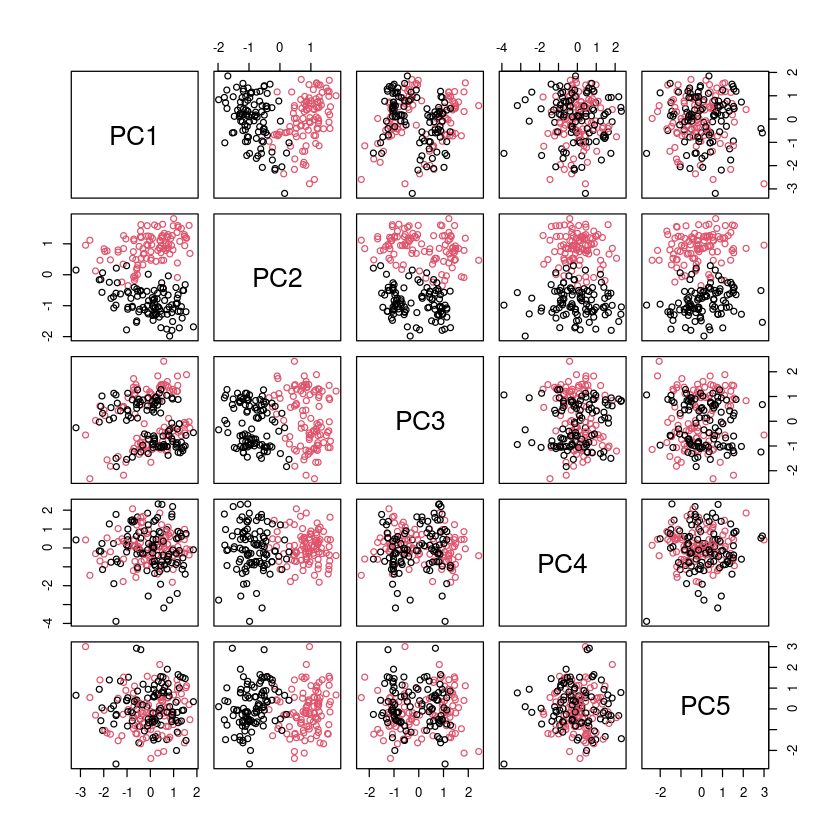

In [11]:
# Grafico de especie para comprobar lo que ya encontré
pairs(crabs.pca.scale.x, col = crabs$sp)
pairs(crabs.pca.scale.x, col = crabs$sex)


Como se ve en los graficos el sexo también se deberia poder separar. Procedo a probar acotando las variables.

In [12]:
crabs.pca.scale.sex <- crabs.pca.scale.x[, 1:2]
km.pca.scale.sex <- kmeans(crabs.pca.scale.sex, 2)
# checkcluster(km.pca.scale.sex$cluster, crabs$sp);
checkcluster(km.pca.scale.sex$cluster, crabs$sex)

crabs.pca.scale2.sex <- scale(crabs.pca.scale.x)
km.pca.scale2.sex <- kmeans(crabs.pca.scale2.sex, 2)
checkcluster(km.pca.scale2.sex$cluster, crabs$sex)


Direct agreement: 2 of 2 pairs
Cases in matched pairs: 94 %
     real
clust  M  F
    1 97  9
    2  3 91
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 95 %
     real
clust  M  F
    1 96  6
    2  4 94


Comprobado que la clase sex separa en clusters ( ͡° ͜ʖ ͡°)

Escalar después de PCA no hizo nada

Hice todo esto con kmeans, voy a probar un poco con cluster jerarquico pero no prometo llegar a nada

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 77.5 %
     real
clust   B   O
    1 100  45
    2   0  55
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 71.5 %
     real
clust  F  M
    1 94 51
    2  6 49


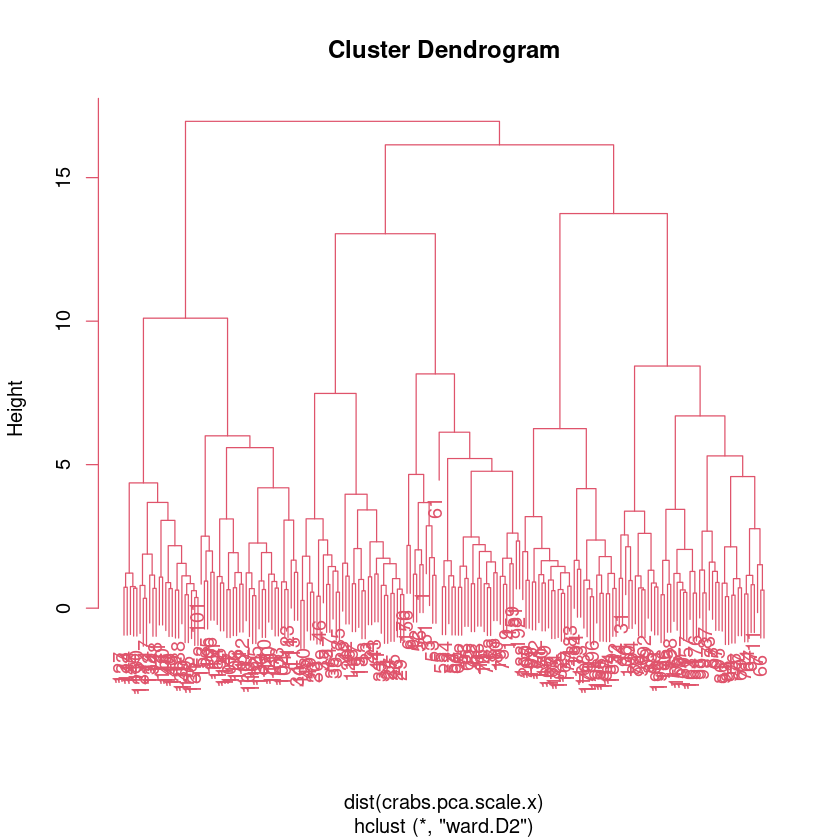

In [13]:
# Quiero probar crabs.pca.scale.x con hclust

hc <- hclust(dist(crabs.pca.scale.x), method = "ward.D2")
plot(hc, col = as.numeric(crabs$sex), pch = as.numeric(crabs$sp))

# quiero cortar un poco el dendrograma

hc.cut <- cutree(hc, k = 2)
checkcluster(hc.cut, crabs$sp)
checkcluster(hc.cut, crabs$sex)
# plot(hc.cut, col=as.numeric(crabs$sex), pch=as.numeric(crabs$sp))


# Lampone

In [14]:
load("lampone.Rdata")
summary(lampone)


   anno         m33              m34              m35             m36         
 2006:19   Min.   : 13.31   Min.   :0.1600   Min.   :0.020   Min.   :0.00000  
 2007:30   1st Qu.: 37.70   1st Qu.:0.3900   1st Qu.:0.060   1st Qu.:0.01000  
           Median : 63.97   Median :0.6500   Median :0.110   Median :0.01000  
           Mean   : 69.47   Mean   :0.7751   Mean   :0.132   Mean   :0.01143  
           3rd Qu.: 80.30   3rd Qu.:0.9800   3rd Qu.:0.170   3rd Qu.:0.01000  
           Max.   :255.31   Max.   :2.9500   Max.   :0.540   Max.   :0.02000  
                                                                              
      m40         m41              m42               m43       
 Min.   :0   Min.   :0.0600   Min.   :0.01000   Min.   : 1.49  
 1st Qu.:0   1st Qu.:0.1400   1st Qu.:0.02000   1st Qu.: 5.45  
 Median :0   Median :0.2500   Median :0.03000   Median :10.42  
 Mean   :0   Mean   :0.2818   Mean   :0.03449   Mean   :15.09  
 3rd Qu.:0   3rd Qu.:0.3700   3rd Qu.:0.04000   

In [15]:
lampone.vars <- lampone[, -c(1, 143, 144)] # gracias gurvich por el dato de la 144
lampone.pca <- prcomp(lampone.vars)
lampone.pca.scale <- scale(lampone.pca$x)
# kmeans
km.lampone.pca <- kmeans(lampone.pca$x, 2)
km.lampone.pca.scale <- kmeans(lampone.pca.scale, 2)

checkcluster(km.lampone.pca$cluster, lampone[, 1])
checkcluster(km.lampone.pca$cluster, lampone[, 143])

checkcluster(km.lampone.pca.scale$cluster, lampone[, 1])
checkcluster(km.lampone.pca.scale$cluster, lampone[, 143])

# lampone


Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
     real
clust 2007 2006
    1   28    2
    2    2   17
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
     real
clust 10  2
    1 18 12
    2  9 10
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 57.14 %
     real
clust 2006 2007
    1    5    7
    2   14   23
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 63.27 %
     real
clust  2 10
    1  8  4
    2 14 23


Con PCA pude separar por año fácil, pero no por especie, scale tampoco me ayudó. No puedo graficar porque tiene muchas variables aun después de PCA.

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 93.88 %
     real
clust 2006 2007
    1   17    1
    2    2   29
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59.18 %
     real
clust  2 10
    1 10  8
    2 12 19


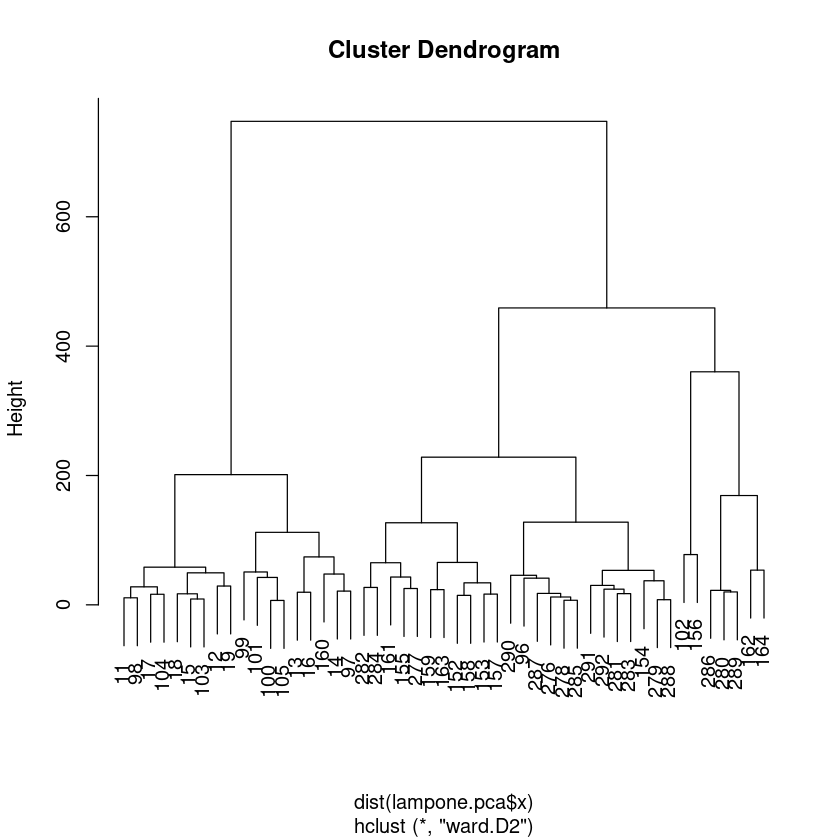

In [16]:
# Purebo con clustering jerarquico

hc.lampone <- hclust(dist(lampone.pca$x), method = "ward.D2")
plot(hc.lampone, col = as.numeric(lampone[, 1]), pch = as.numeric(lampone[, 1]))

hc.lampone.cut <- cutree(hc.lampone, k = 2)
checkcluster(hc.lampone.cut, lampone[, 1])
checkcluster(hc.lampone.cut, lampone[, 143])


## Conclusiones

Después de jugar con pca y scale logré seprar crabs con 100% y 95% de coincidencia, ya sea en sexo o especie.

Con lampone no ocurrió lo mismo, si logré separar por año con casi 91% de coincidencia, pero no por especie.

El clustering jerarquico no le pude agarrar la mano, hice algunos intentos visualmente pero no me dio resultado, o el resultado fue igual a kmeans.

Me doy cuenta que no soy fan de ir probando cosas hasta conseguir algo que me gusta.

# 2)

In [17]:
generador.referencias <- function(data, b) {
    # Trabajo con el dataset en pca
    pca <- prcomp(data)
    pca.x <- pca$x

    filas <- dim(pca.x)[1]
    columnas <- dim(pca.x)[2]
    minmax <- matrix(0, columnas, 2) # Quiero una matriz 2xcolumnas para los rangos de cada variable
    for (i in 1:columnas) {
        minmax[i, 1] <- min(pca.x[, i])
        minmax[i, 2] <- max(pca.x[, i])
    }

    nuevasDatas <- list()

    for (i in 1:b) {
        nuevaData <- c()
        for (j in 1:columnas) {
            columna <- runif(filas, minmax[j, 1], minmax[j, 2])
            nuevaData <- cbind(nuevaData, columna)
        }
        nuevasDatas[[i]] <- as.matrix(nuevaData) # Este doble corchete raro me lo tiraron, no se que hace pero anda
    }

    return(nuevasDatas)
}


In [18]:
GAP <- function(data, k, b) {
    wkb <- matrix(0, b, k)
    gap <- rep(0, k)
    s <- rep(0, k)
    datab <- generador.referencias(data, b)

    for (i in 2:k) {
        km <- kmeans(data, i)
        wk <- km$tot.withinss

        for (j in 1:b) {
            km <- kmeans(datab[[j]], i) # Otra vez el doble corchete, me niego a buscar en google que es. Asumo que es el acceso a listas
            wkb[j, i] <- km$tot.withinss
        }

        gap[i] <- mean(log(wkb[, i])) - log(wk)
        # Hice mal?
        l <- mean(log(wkb[, i]))
        sd <- sqrt(sum((l - log(wkb[, i]))^2) / b)
        s[i] <- sd * sqrt(1 + 1 / b)
    }

    # Descomentar para ver el plot del gap
    # plot(1:k, gap, type = "b", xlab = "Número de clusters", ylab = "Gap Statistic")

    found <- FALSE
    for (i in 1:(k - 1)) {
        if (gap[i] >= (gap[i + 1] - s[i + 1])) {
            kk <- i
            found <- TRUE
            break
        }
    }

    if (!found) {
        kk <- k
    }

    return(kk)
}


In [19]:
score.estabilidad <- function(n, ind1, ind2, cc1, cc2) {
    # pongo los clusters de nuevo en longitud n - quedan 0 los puntos fuera del sample
    v1 <- v2 <- rep(0, n)
    v1[ind1] <- cc1
    v2[ind2] <- cc2
    # creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada clustering
    a <- sqrt(v1 %*% t(v1))
    m1 <- a / -a + 2 * (a == round(a))
    m1[is.nan(m1)] <- 0
    a <- sqrt(v2 %*% t(v2))
    m2 <- a / -a + 2 * (a == round(a))
    m2[is.nan(m2)] <- 0
    # calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
    validos <- sum(v1 * v2 > 0)
    score <- sum((m1 * m2)[upper.tri(m1)] > 0) / (validos * (validos - 1) / 2)
    return(score)
}


In [20]:
estabilidad <- function(data, k, rep) {
    filas <- dim(data)[1]
    porcentaje <- 0.9

    # creo los subsamples
    indices.subsample <- list()
    for (i in 1:rep) {
        indices.subsample[[i]] <- sample(filas, filas * porcentaje)
    }

    # calculo estabilidad por cada n clusters
    estabilidad <- rep(0, k)
    for (i in 2:k) {
        # calculo los clusters para cada subsample
        clusters <- list()
        for (j in 1:rep) {
            clusters[[j]] <- kmeans(data[indices.subsample[[j]], ], i)$cluster
        }

        # calculo el score de estabilidad para cada subsample
        scores <- rep(0, rep)
        for (j in 1:rep) {
            scores[j] <- score.estabilidad(filas, indices.subsample[[j]], indices.subsample[[j]], clusters[[j]], clusters[[j]])
        }

        # calculo el score de estabilidad promedio
        estabilidad[i] <- mean(scores)
    }

    return(which.max(estabilidad))
}


In [21]:
gen.gausianas <- function(tot.puntos) {
    gap <- 2
    x <- rnorm(tot.puntos, mean = -gap)
    y <- rnorm(tot.puntos, mean = -gap)
    gausianas <- cbind(x, y, rep(1, length(x)))
    x <- rnorm(tot.puntos, mean = 2 * gap)
    y <- rnorm(tot.puntos, mean = 0)
    gausianas <- rbind(gausianas, cbind(x, y, rep(2, length(x))))
    x <- rnorm(tot.puntos, mean = 0.7 * gap, sd = 0.5)
    y <- rnorm(tot.puntos, mean = 2.5 * gap, sd = 0.5)
    gausianas <- rbind(gausianas, cbind(x, y, rep(3, length(x))))
    x <- rnorm(tot.puntos, mean = -gap, sd = 0.5)
    y <- rnorm(tot.puntos, mean = gap, sd = 0.5)
    gausianas <- rbind(gausianas, cbind(x, y, rep(4, length(x))))
    return(gausianas)
}


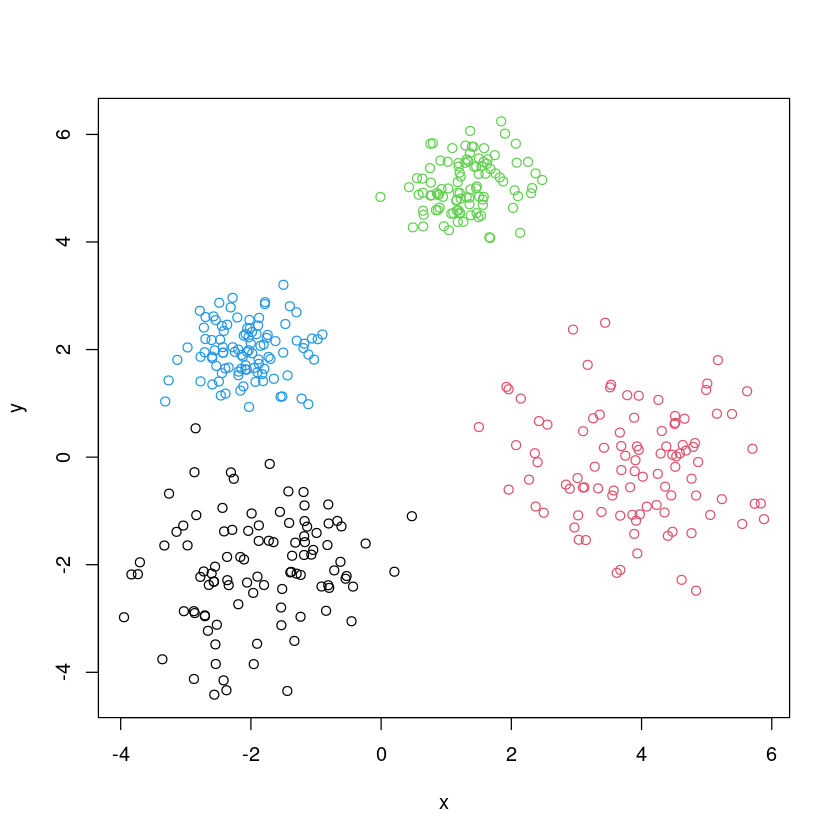

In [22]:
gaus <- gen.gausianas(100)
plot(gaus[, 1:2], col = gaus[, 3])


# 3)
Aplico GAP y estabilidad a crabs, lampone y gaus

## 4 Gausianas

In [23]:
for (i in 1:5) {
    clusters <- c()
    clusters <- cbind(clusters, GAP(gaus, 10, 100))
    clusters <- cbind(clusters, estabilidad(gaus, 10, 100))
    print(clusters)
}


     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    4    2
     [,1] [,2]
[1,]    4    2
     [,1] [,2]
[1,]    4    2
     [,1] [,2]
[1,]    3    2


## Lampone

In [24]:
for (i in 1:5) {
    clusters <- c()
    clusters <- cbind(clusters, GAP(lampone.pca$x, 10, 100))
    clusters <- cbind(clusters, estabilidad(lampone.pca$x, 10, 100))
    print(clusters)
}

     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2


## Crabs

In [25]:
for (i in 1:5) {
    clusters <- c()
    clusters <- cbind(clusters, GAP(crabs.pca.scale.x, 10, 100))
    clusters <- cbind(clusters, estabilidad(crabs.pca.scale.x, 10, 100))
    print(clusters)
}

     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2
     [,1] [,2]
[1,]    2    2


## Conclusiones

**Si mis métodos están bien programados**, pude ver que dieron el resultado correcto en casi todos los casos. 
Gap fue un poco inconsistente en el caso de las gausianas, pero en la matyoria de las corridas daba el número correcto de clusters.
El unico con problemas fué estabilidad en las 4 gausianas, siempre me devolvió 2. Intuyo que ocurre porque un cluster falso de 2 fue considerado estable como comentaste en la clase, **o lo programe mal :P** (PD: No soy fan de R).


Intento graficarlo abajo pero me imagino que son basado en el gráfico de arriba (azul y negro) y (rojo y verde).


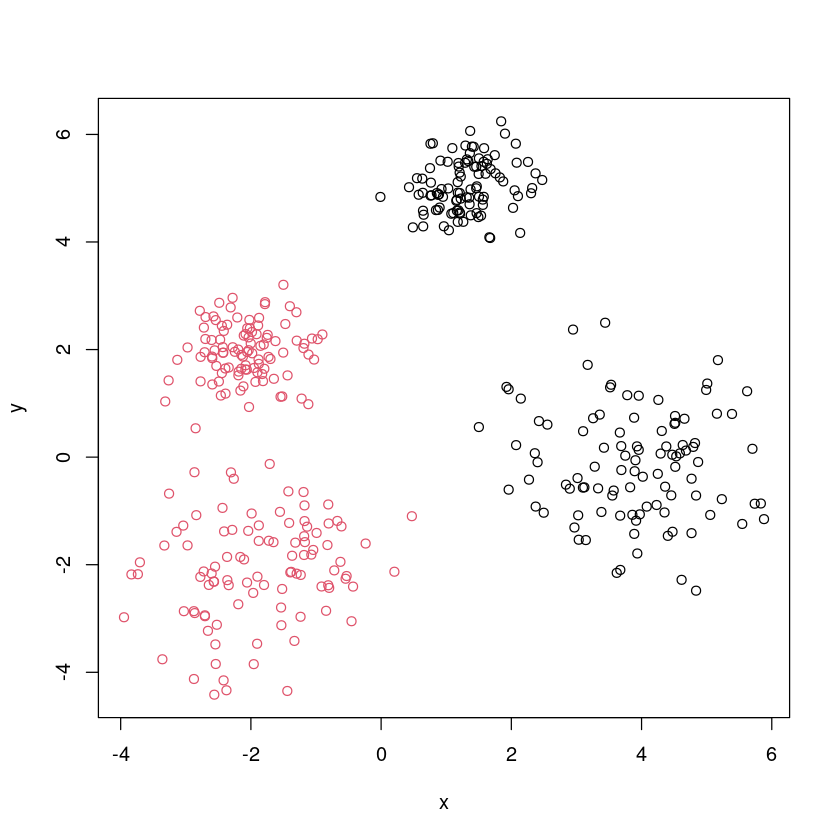

In [26]:
kgaus <- kmeans(gaus[, 1:2], 2);
plot(gaus[, 1:2], col = kgaus$cluster)
# En efecto es como pensé, pero es muy raro, 4 clusters deberían tener mucha mayor estabilidad o eso creo

# 4)

https://www.kaggle.com/datasets/kingabzpro/heart-disease-patients

In [27]:
# save csv in variable
# 
csv <- read.csv("heart_disease_patients.csv", header = TRUE, sep = ",")

In [29]:
pca <- prcomp(csv[,-1], center = TRUE, scale. = TRUE)

# Pruebo GAP solo
gap <- GAP(csv[,-1], 10, 100)

# Pruebo GAP con PCA
gap.pca <- GAP(pca$x, 10, 100)

# Pruebo estabilidad solo
est <- estabilidad(csv[,-1], 10, 100)

# Pruebo estabilidad con PCA
est.pca <- estabilidad(pca$x, 10, 100)

print(c(gap, est, gap.pca, est.pca))

[1] 2 2 2 2


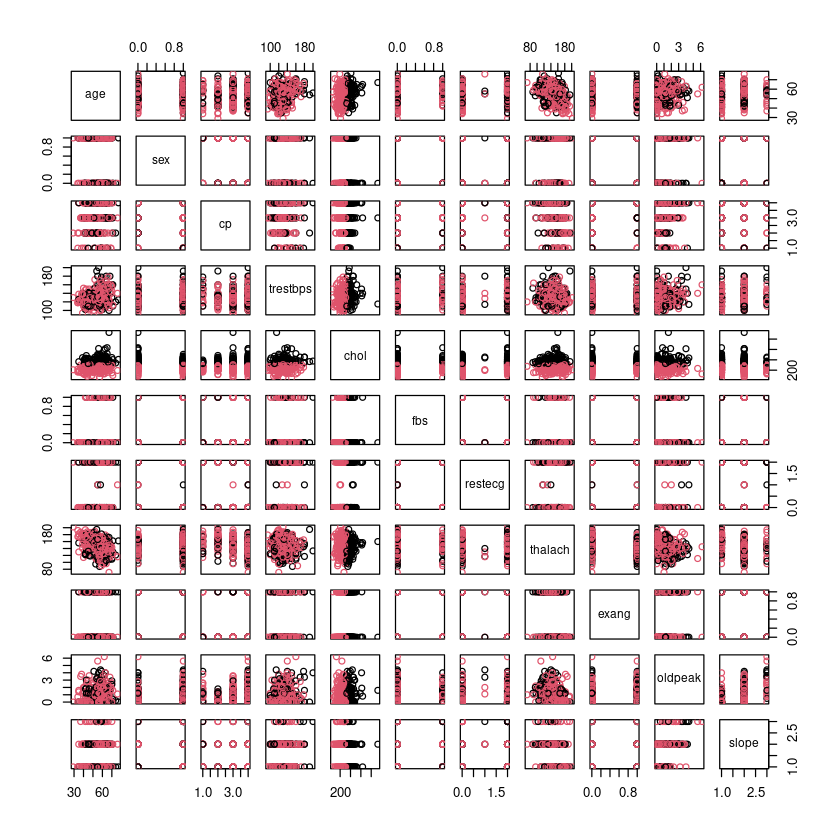

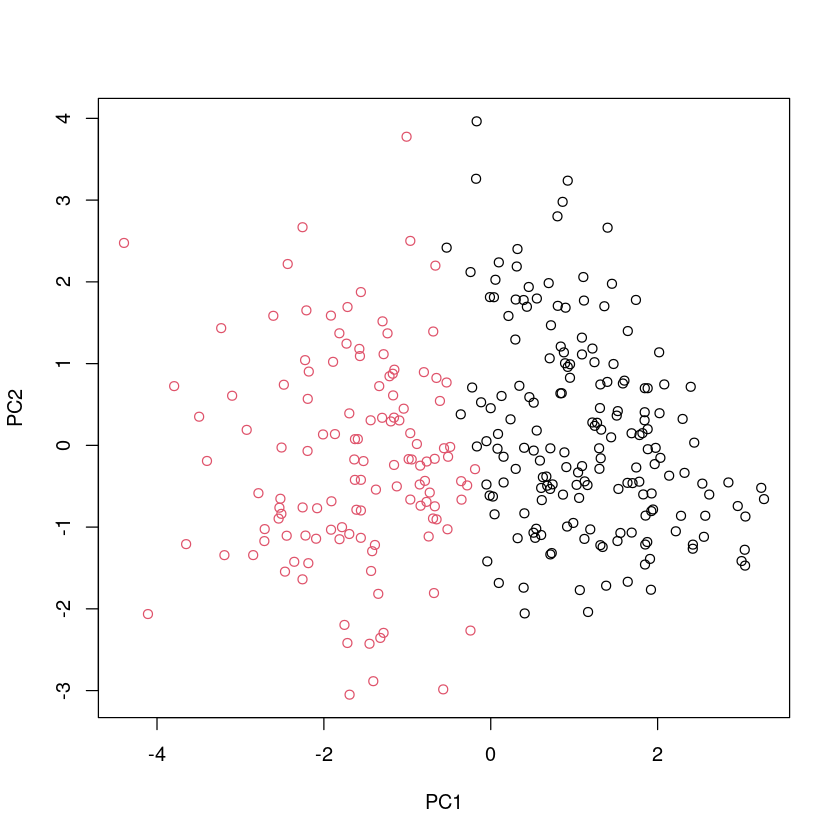

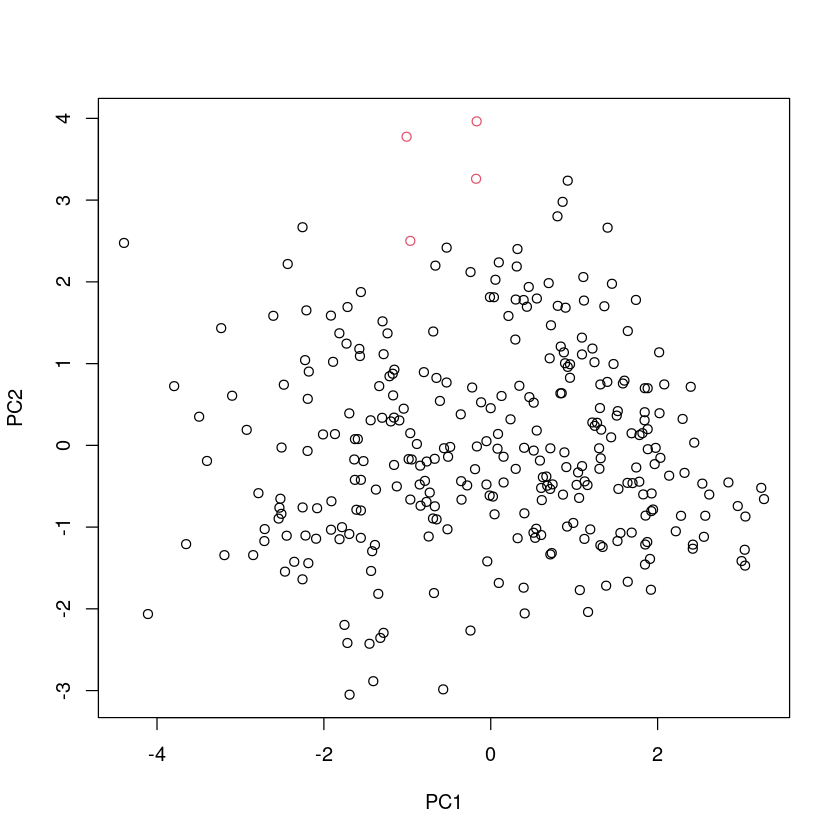

In [30]:
# Todos me recomiendan usar 2

# Pruebo kmeans solo
kk <- kmeans(csv[,-1], 2)
plot <- plot(csv[,-1], col = kk$cluster)

# Pruebo kmeans con PCA
kk <- kmeans(pca$x, 2)
plot <- plot(pca$x, col = kk$cluster)

# Pruebo hclust con PCA
hclust <- hclust(dist(pca$x))
cut <- cutree(hclust, k = 2)
plot <- plot(pca$x, col = cut)


## Conclusiones

Este dataset es sobre pacientes con problemas cardíacos, pude obtener 2 clusters como me lo recomendaron los metodos gap y estabilidad.
K-means y hclust fueron muy estables despues de algunas repeticiones pero kmeans me  separó mejor los datos. hclust siempre me separo 1 cluster chico y otro grande.

Por lo que noté la variable que hizo la mayoría de la separeción fue el nivel de colesterol en sangre (#chol), yo pensé que iba a ser algo como el sexo que me parece algo mas marcado.

Separar en grupos parecidos permite ofrecerles tratamientos similares y esperar resultados similares.


### FIN